# Домашнее задание

**Лясковский Максим Альбертович**, группа ИУ5-24М.

## Задание
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# Ход работы

In [75]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import graphviz

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree

import seaborn as sns

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
data = pd.read_csv('data/heart-disease-uci.zip', header=0)

In [20]:
df = data.copy()

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 20)

Populating the interactive namespace from numpy and matplotlib


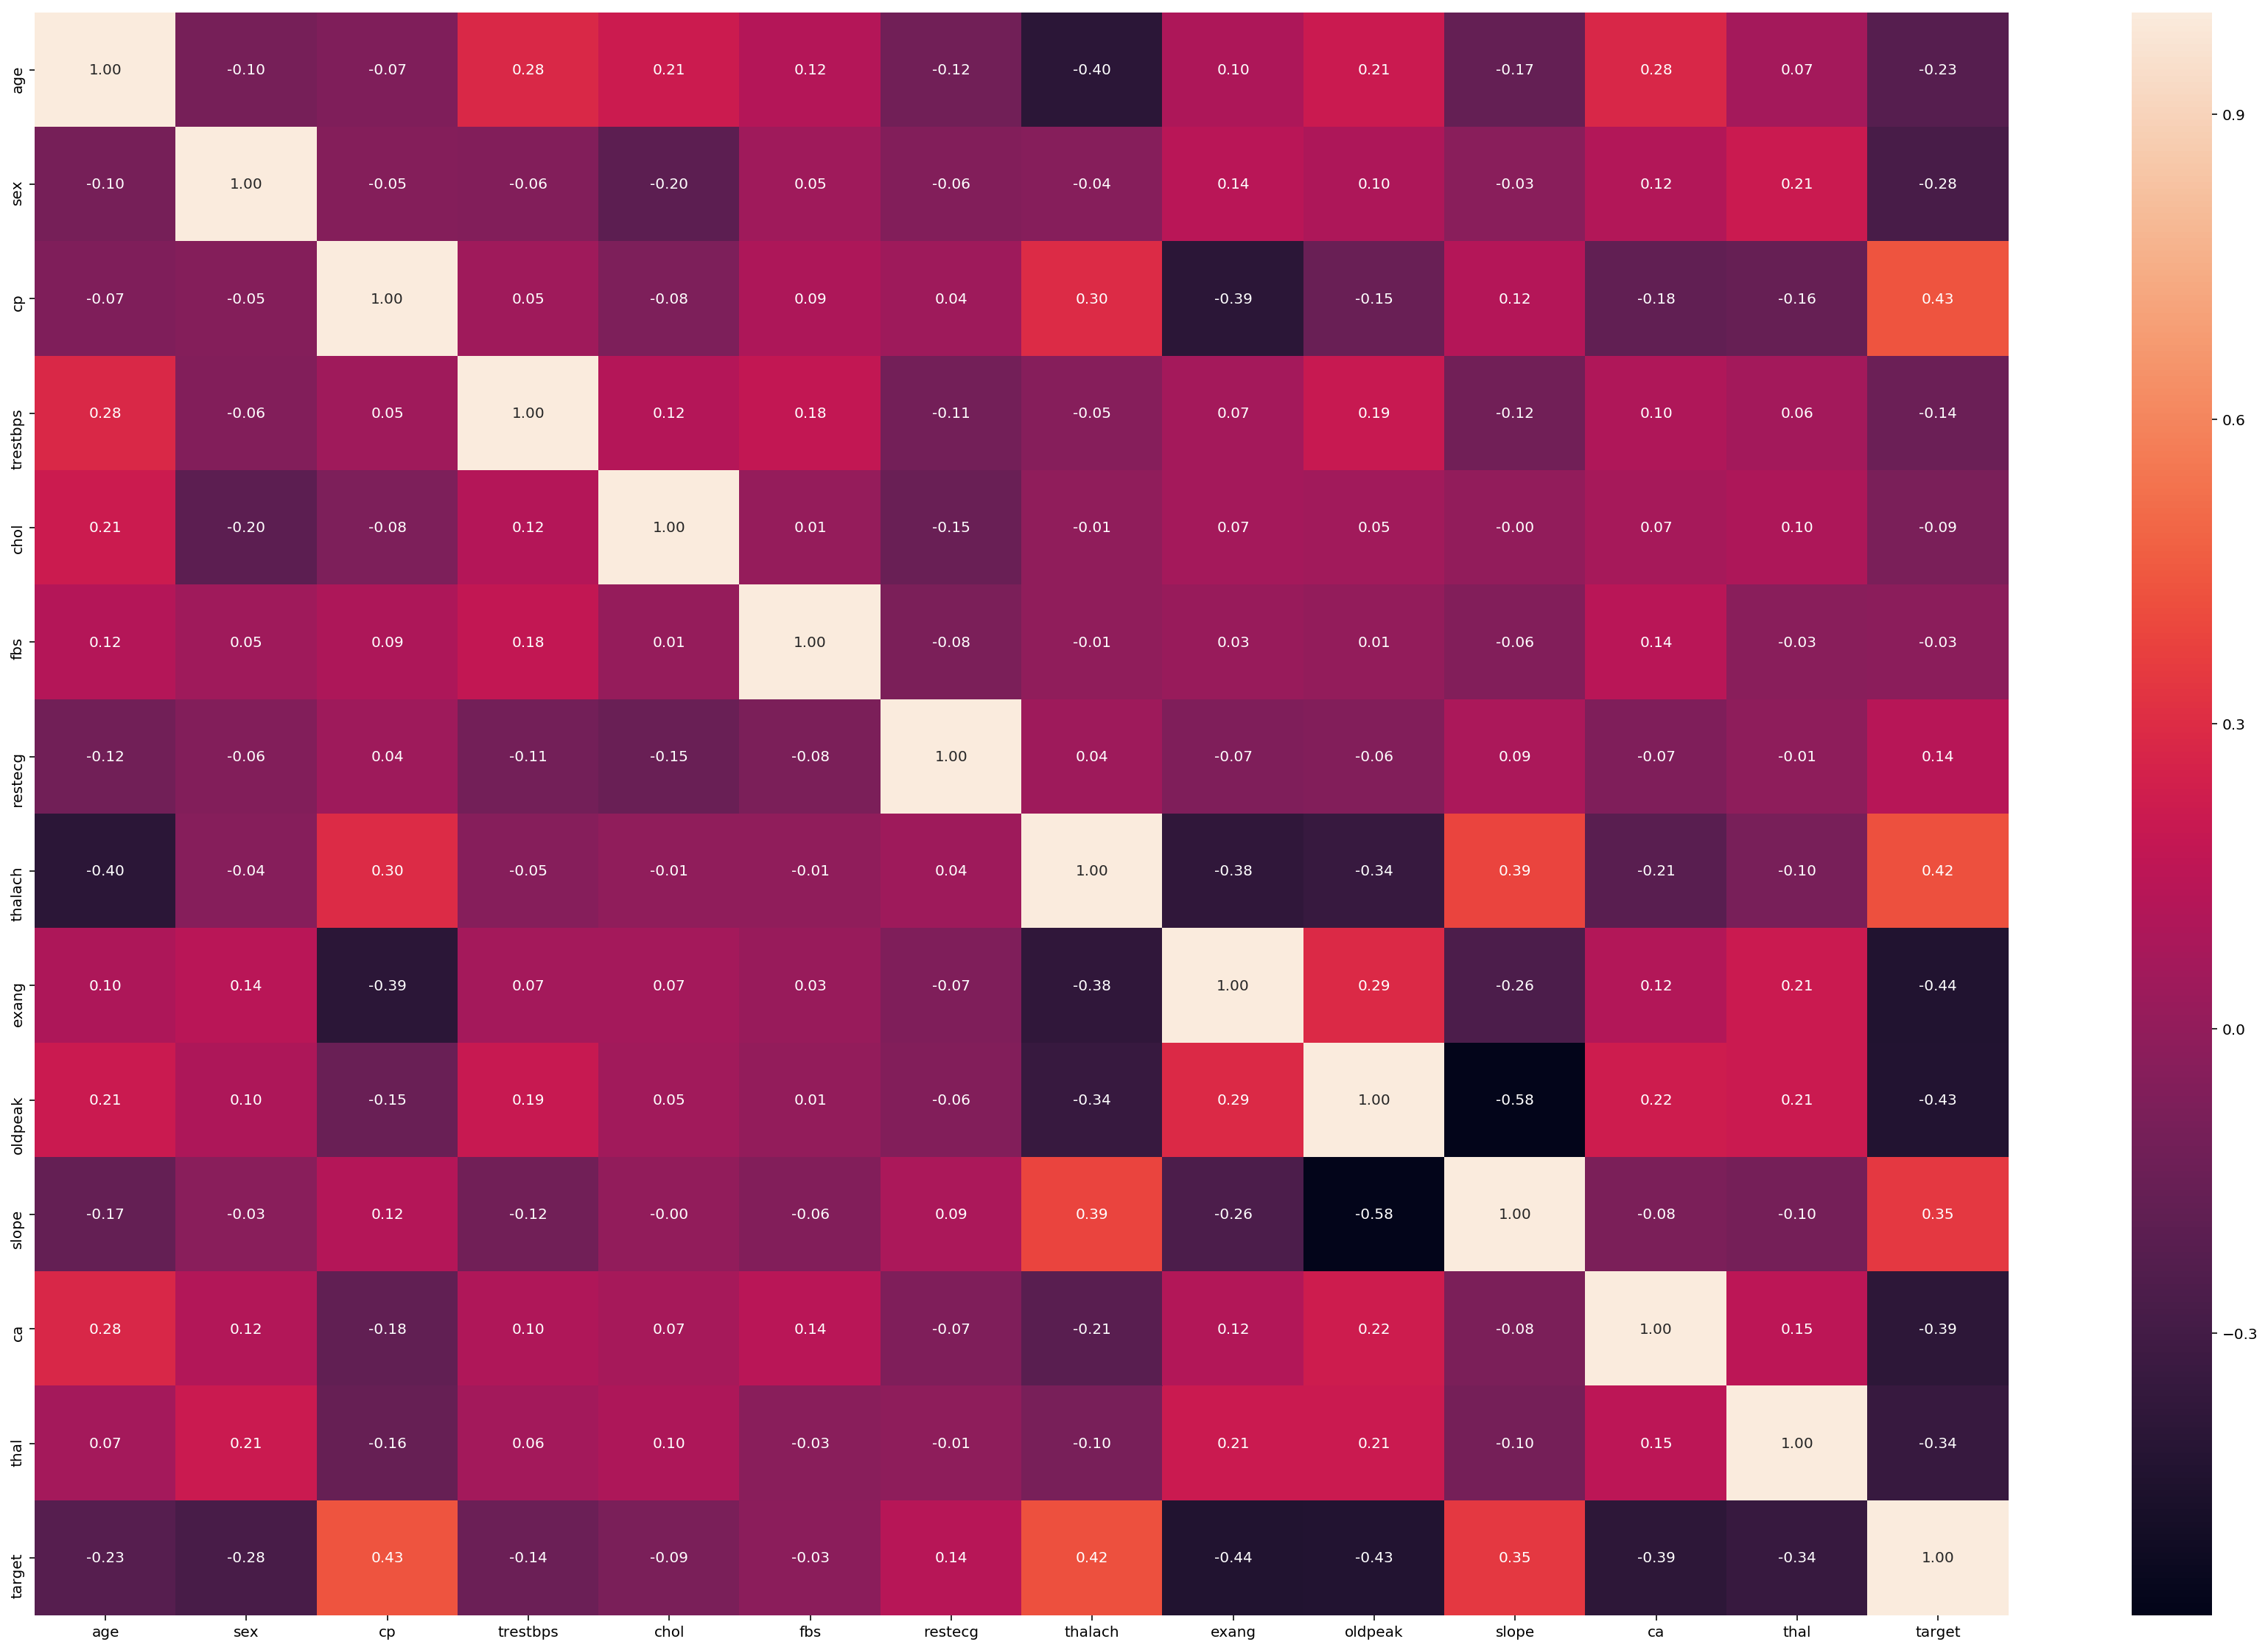

In [15]:
sns.heatmap(data=df.corr(), annot=True, fmt='.2f');

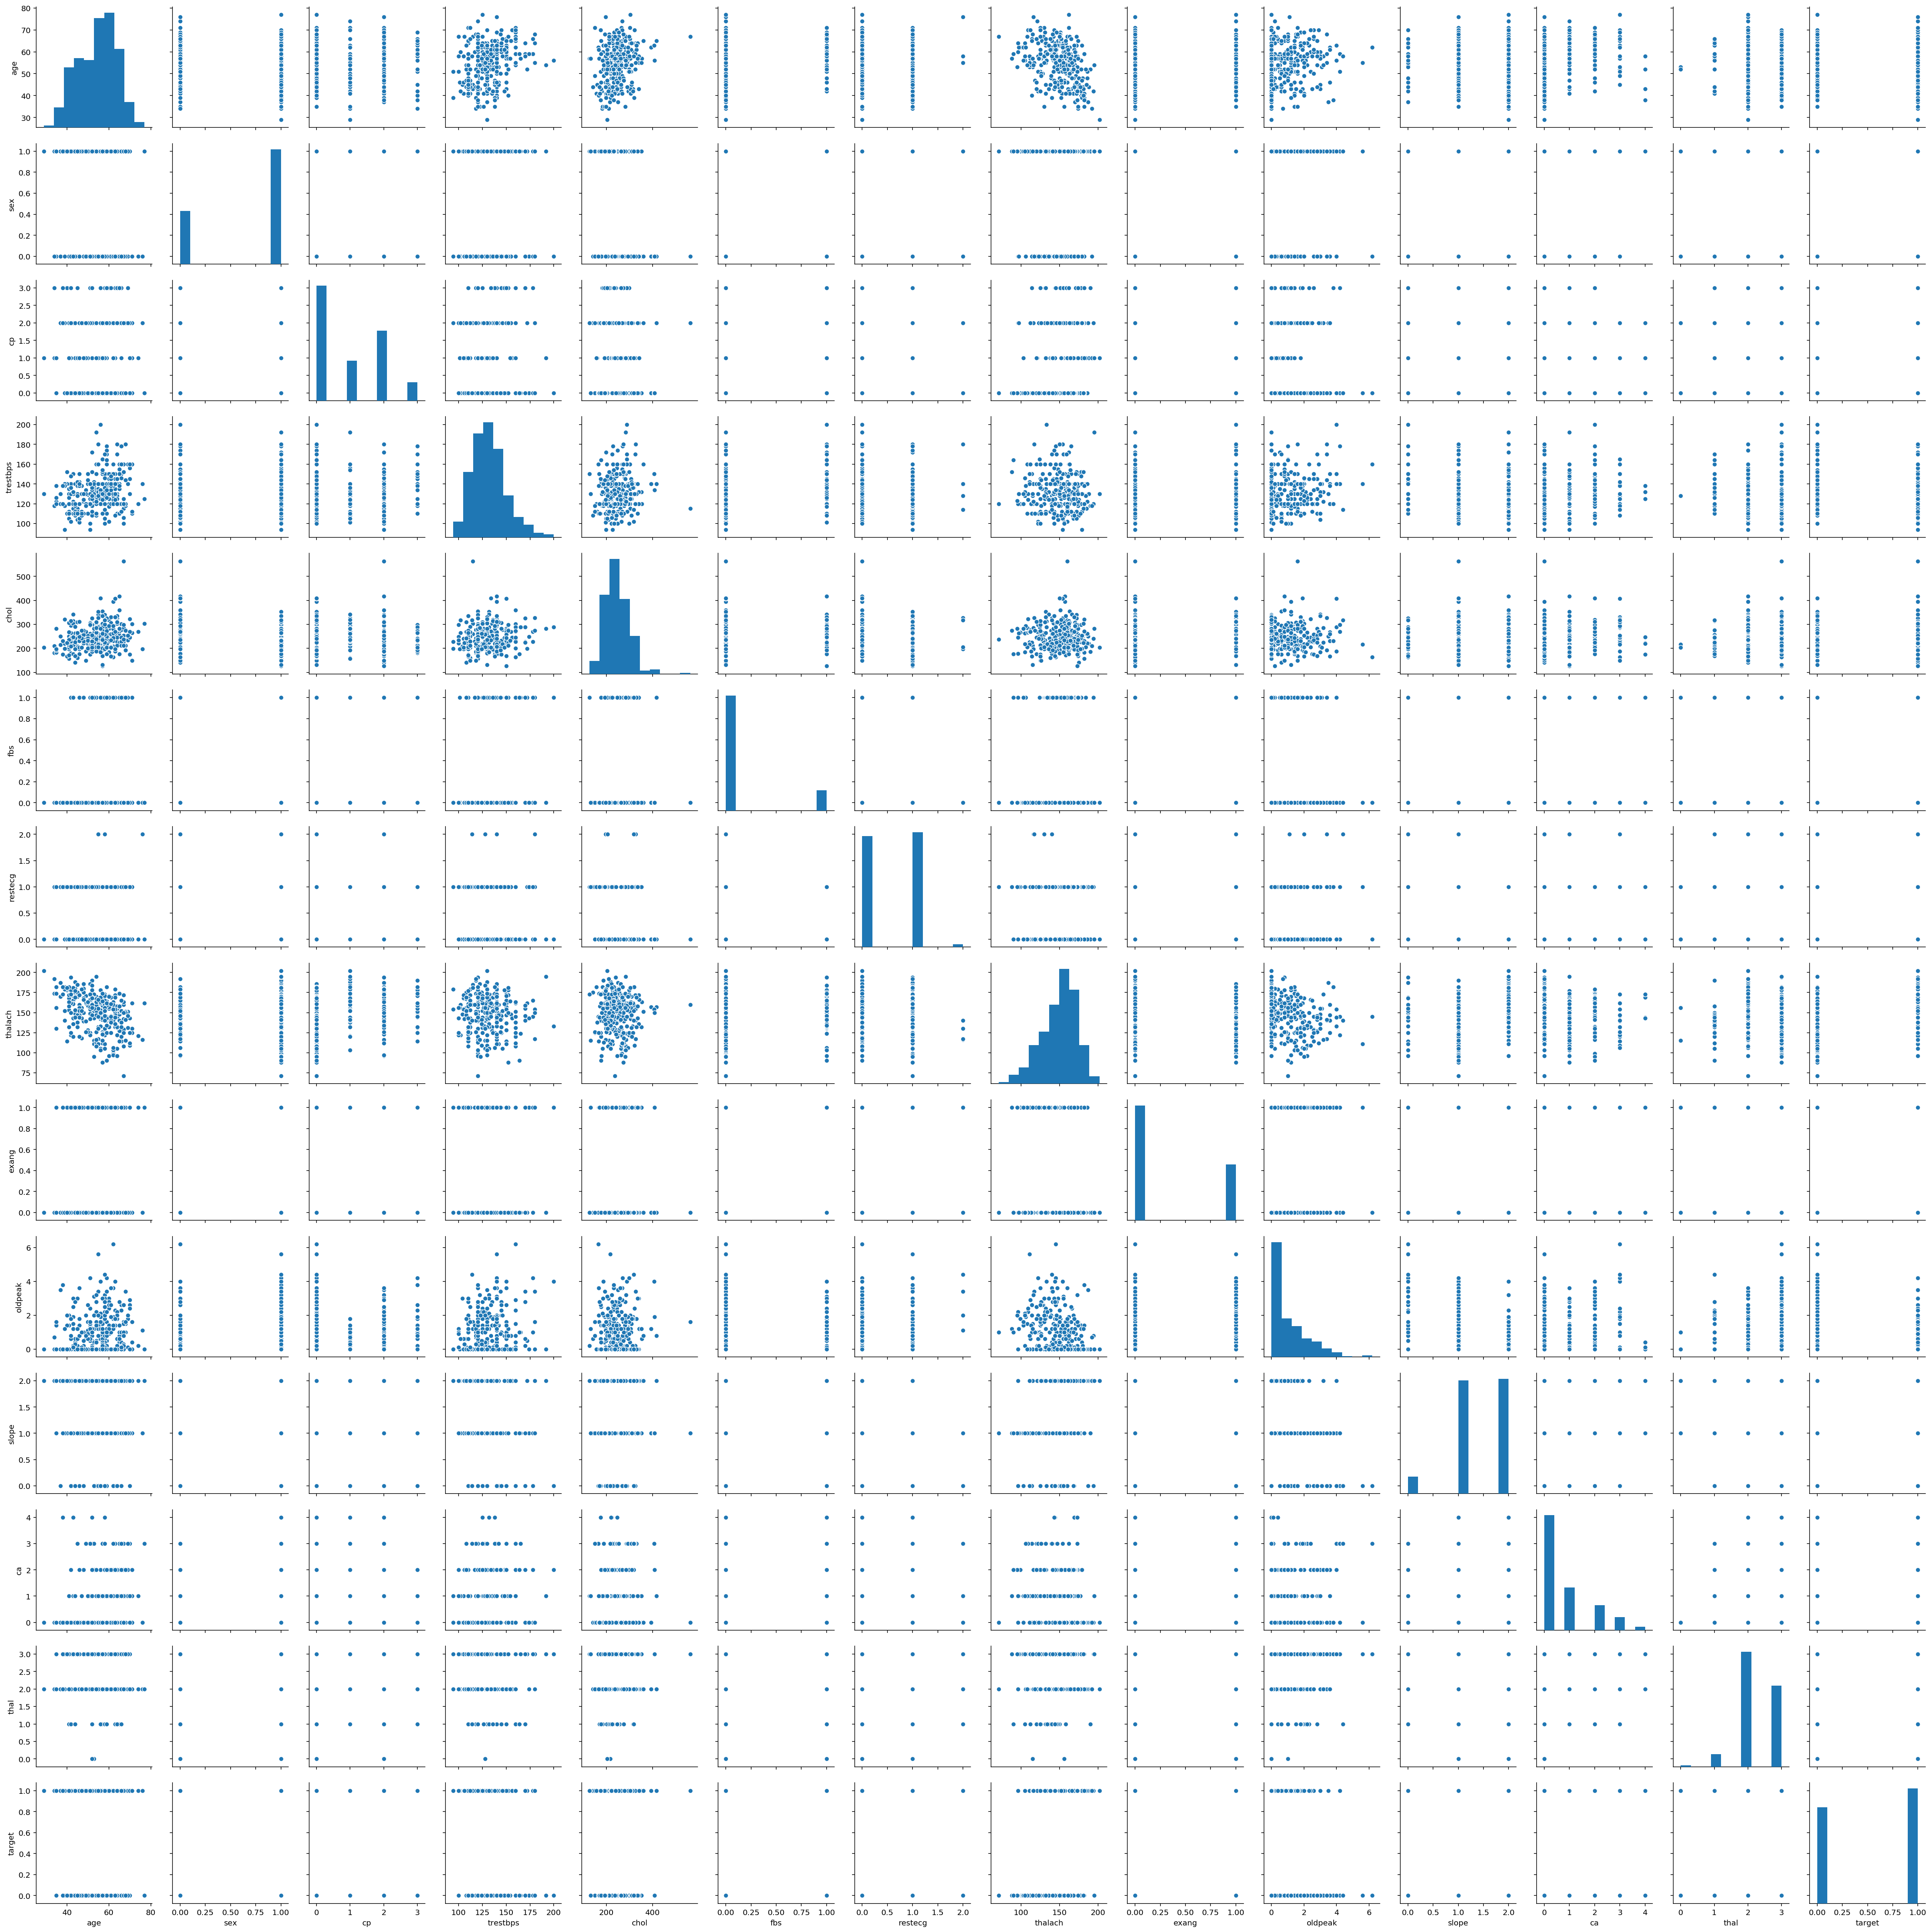

In [16]:
sns.pairplot(df)

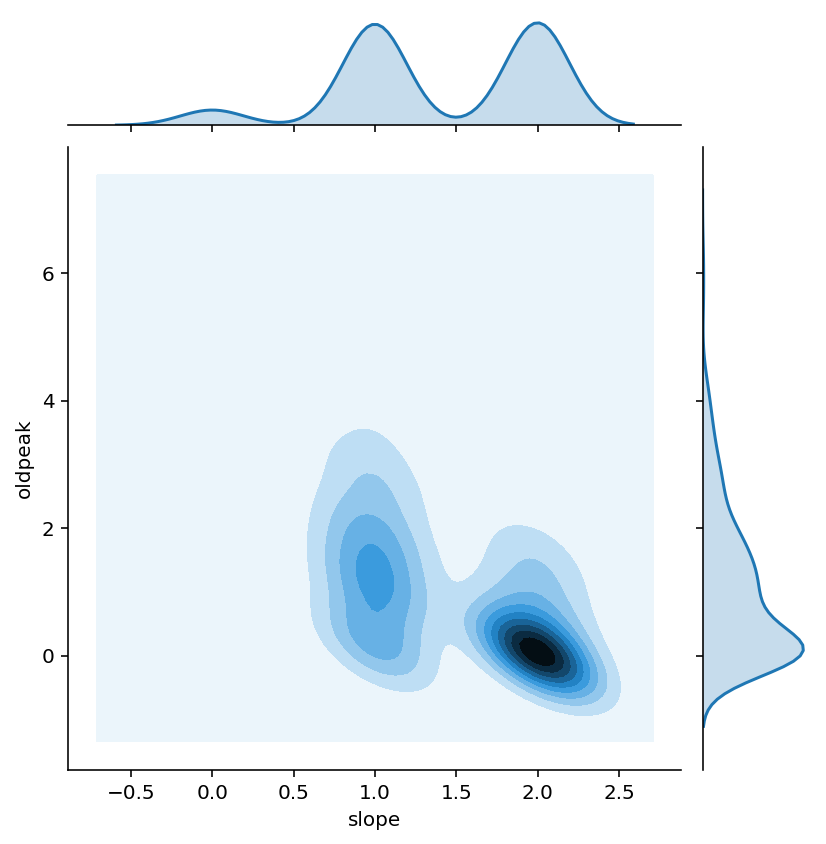

In [17]:
sns.jointplot(data=df, x='slope', y='oldpeak', kind='kde')

/home/anybyte/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


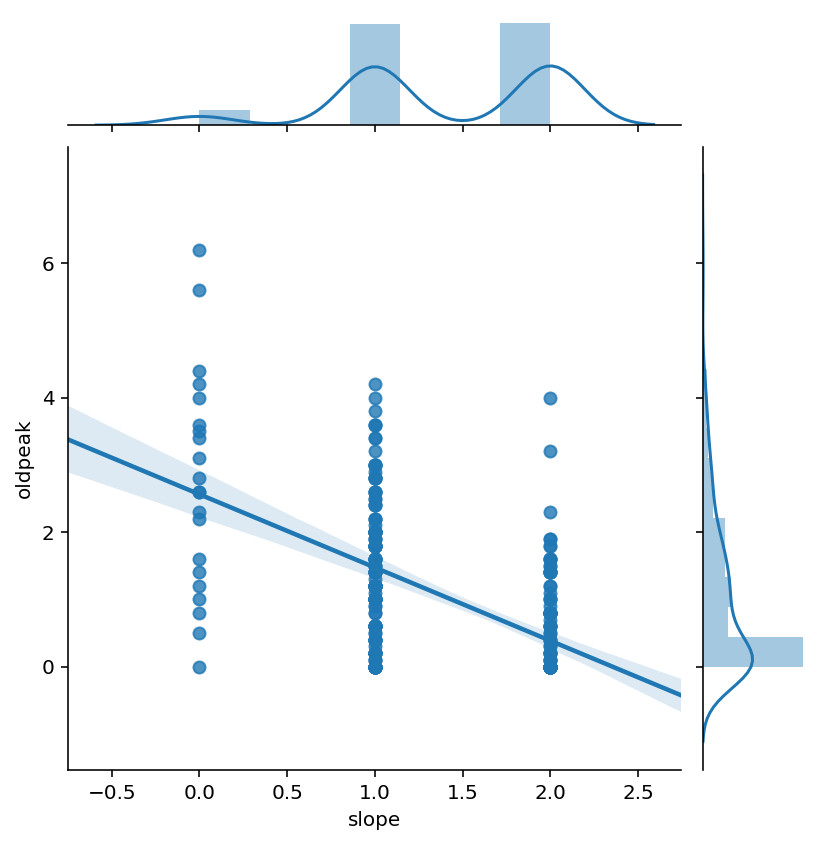

In [19]:
sns.jointplot(data=df, x='slope', y='oldpeak', kind='reg')

## Разделение данных
Разделим данные на&nbsp;целевой столбец и признаки:

In [22]:
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
print(X.head(), "\n")
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2   

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [24]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


Предобработаем данные, чтобы методы работали лучше:

In [25]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


## Обучение моделей

Напишем функцию, которая считает метрики построенной модели:

In [28]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("accuracy:",
          accuracy_score(y_test, model.predict(X_test).round()))
    print("balanced_accuracy:",
          balanced_accuracy_score(y_test, model.predict(X_test).round()))

## Метод ближайших соседей

Напишем функцию, которая считает метрики построенной модели:

In [72]:
reg_5 = KNeighborsClassifier(n_neighbors=5)
reg_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Проверим метрики построенной модели:

In [73]:
test_model(reg_5)

mean_absolute_error: 0.17105263157894737
median_absolute_error: 0.0
accuracy: 0.8289473684210527
balanced_accuracy: 0.8204301075268817


Видно, что средние ошибки не очень показательны для одной модели, они больше подходят для сравнения разных моделей. В тоже время коэффициент детерминации неплох сам по себе, в данном случае модель более-менее состоятельна.

## Использование кросс-валидации

Проверим различные стратегии кросс-валидации. Для начала посмотрим классический K-fold:

In [76]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y,
                         cv=KFold(n_splits=10))
print(scores)
print(scores.mean(), "±", scores.std())

[0.87096774 0.83870968 0.83870968 0.8        0.8        0.76666667
 0.66666667 0.9        0.76666667 0.53333333]
0.7781720430107527 ± 0.10216643905662431


In [77]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y,
                         cv=RepeatedKFold(n_splits=5, n_repeats=2))
print(scores)
print(scores.mean(), "±", scores.std())

[0.80327869 0.90163934 0.78688525 0.81666667 0.83333333 0.83606557
 0.85245902 0.8852459  0.78333333 0.75      ]
0.8248907103825136 ± 0.0445017220649303


In [78]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y,
                         cv=ShuffleSplit(n_splits=10))
print(scores)
print(scores.mean(), "±", scores.std())

[0.83870968 0.80645161 0.83870968 0.87096774 0.87096774 0.77419355
 0.74193548 0.77419355 0.77419355 0.74193548]
0.8032258064516128 ± 0.046634942886454714


## Подбор гиперпараметра $K$

Введем список настраиваемых параметров:

In [80]:
n_range = np.array(range(1, 50, 1))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

Запустим подбор параметра:

In [81]:
gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10),
                  return_train_score=True)
gs.fit(X, y)
gs.best_params_

{'n_neighbors': 4}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

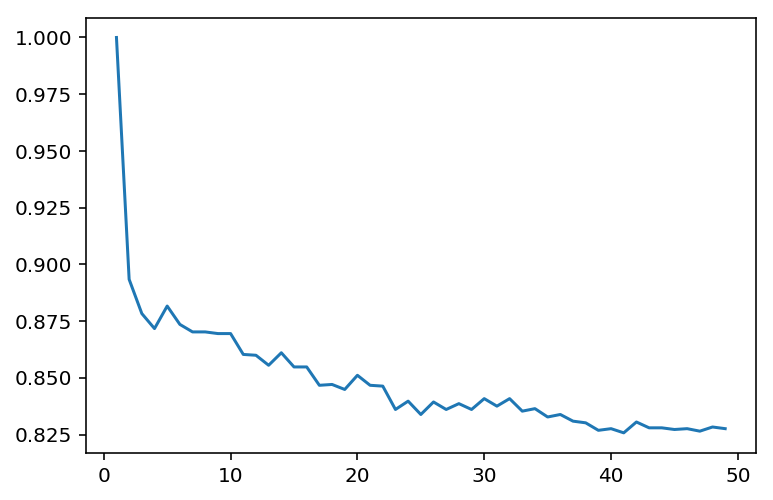

In [82]:
plt.plot(n_range, gs.cv_results_["mean_train_score"]);

Очевидно, что для&nbsp;$K=1$ на&nbsp;тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность.

На&nbsp;тестовом наборе данных картина сильно интереснее:

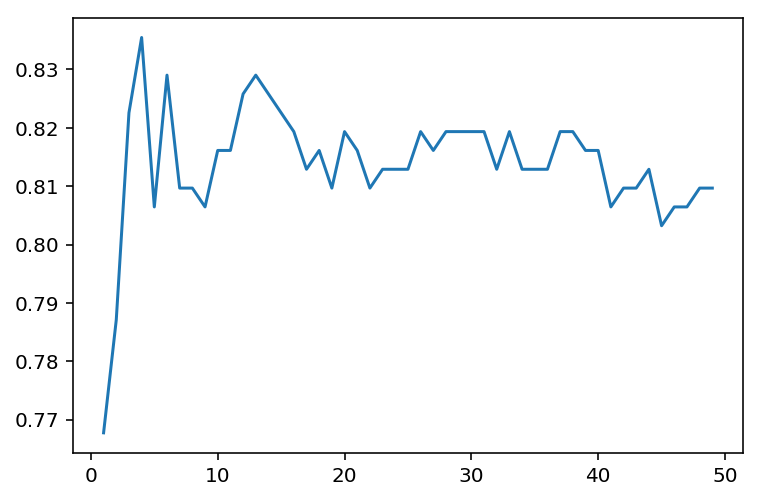

In [84]:
plt.plot(n_range, gs.cv_results_["mean_test_score"]);

Выходит, что сначала соседей слишком мало (высоко влияние выбросов), а затем количество соседей постепенно становится слишком велико, и среднее значение по&nbsp;этим соседям всё больше и больше оттягивает значение от&nbsp;истинного.

Проверим получившуюся модель:

In [85]:
reg = KNeighborsClassifier(**gs.best_params_)
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.2236842105263158
median_absolute_error: 0.0
accuracy: 0.7763157894736842
balanced_accuracy: 0.7910394265232975


В целом получили примерно тот же результат. Очевидно, что проблема в том, что данный метод не может дать хороший результат для данной выборки.

Построим кривую обучения<cite data-cite="doc:sklearn"></cite>:

In [86]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None):
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

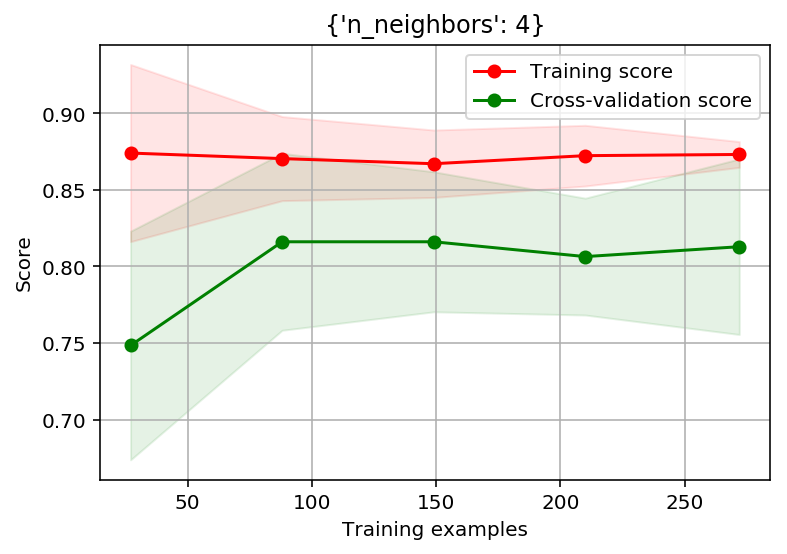

In [87]:
plot_learning_curve(reg, str(gs.best_params_), X, y,
                    cv=ShuffleSplit(n_splits=10));

Построим кривую валидации:

In [88]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name,
        param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=4)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean,
                 label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

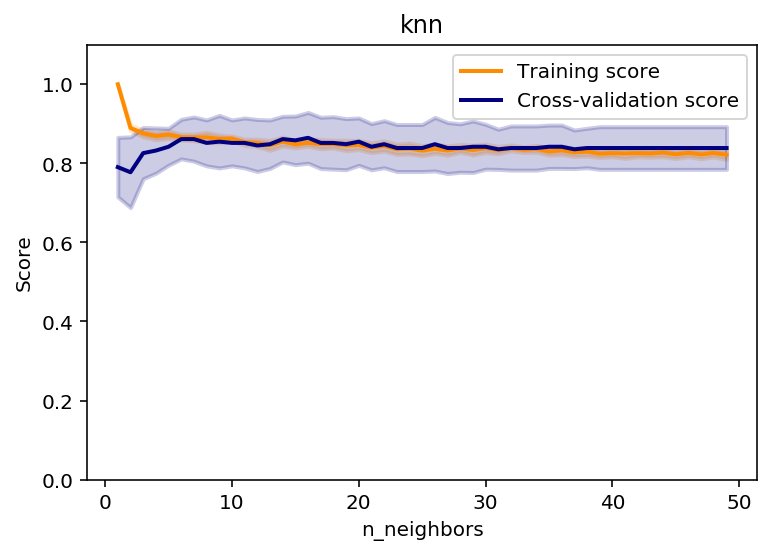

In [89]:
plot_validation_curve(KNeighborsClassifier(), "knn", X, y, 
                      param_name="n_neighbors", param_range=n_range, 
                      cv=ShuffleSplit(n_splits=10));

### Модель бинарной классификации — LogisticRegression

Попробуем метод LogisticRegression с&nbsp;гиперпараметром $\alpha=1$:

In [34]:
cl1 = LogisticRegression()
cl1.fit(X_train, y_train)

/home/anybyte/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
test_model(cl1)

mean_absolute_error: 0.15789473684210525
median_absolute_error: 0.0
accuracy: 0.8421052631578947
balanced_accuracy: 0.8315412186379928


Видно, что данный метод без настройки гиперпараметров несколько хуже, чем метод  𝐾  ближайших соседей.

### SVC

Попробуем метод SVC:

In [39]:
linear_1 = SVC(C=1.0, gamma='auto')
linear_1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
test_model(linear_1)

mean_absolute_error: 0.19736842105263158
median_absolute_error: 0.0
accuracy: 0.8026315789473685
balanced_accuracy: 0.7982078853046595


Внезапно LinearSVC показал результаты хуже по&nbsp;средней абсолютной ошибке и коэффициенте детерминации.

### Дерево решений

Попробуем дерево решений с&nbsp;неограниченной глубиной дерева:

In [43]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим метрики построенной модели:

In [44]:
test_model(dt_none)

mean_absolute_error: 0.25
median_absolute_error: 0.0
accuracy: 0.75
balanced_accuracy: 0.7587813620071684


Дерево решений показало прямо-таки очень хороший результат по&nbsp;сравнению с&nbsp;рассмотренными раньше методами. Оценим структуру получившегося дерева решений:

In [45]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

In [46]:
stat_tree(dt_none)

Всего узлов: 71
Листовых узлов: 36
Глубина дерева: 9
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 6.083333333333333


## Подбор гиперпараметра $K$

### Модель бинарной классификации — LogisticRegression

Введем список настраиваемых параметров:

In [47]:
param_range = np.arange(0.001, 2.01, 0.1)
tuned_parameters = [{'C': param_range}]
tuned_parameters

[{'C': array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
         6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
         1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
         1.801e+00, 1.901e+00, 2.001e+00])}]

Запустим подбор параметра:

In [48]:
gs = GridSearchCV(LogisticRegression(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10),
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

/home/anybyte/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.501, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

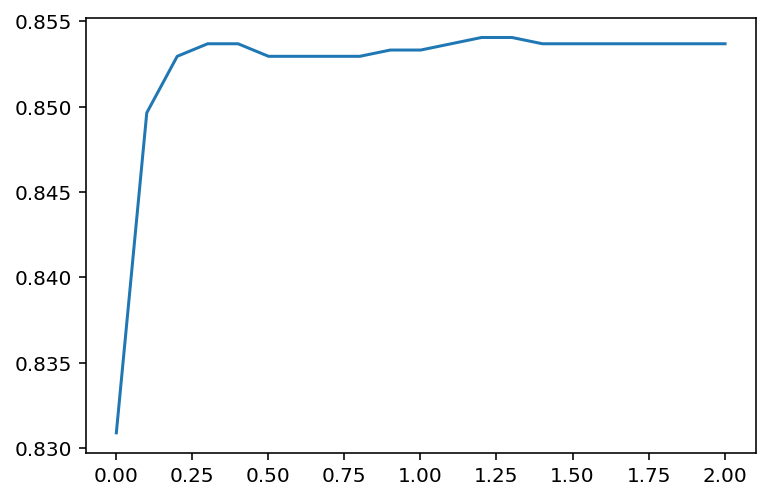

In [49]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

На&nbsp;тестовом наборе данных картина ровно та же:

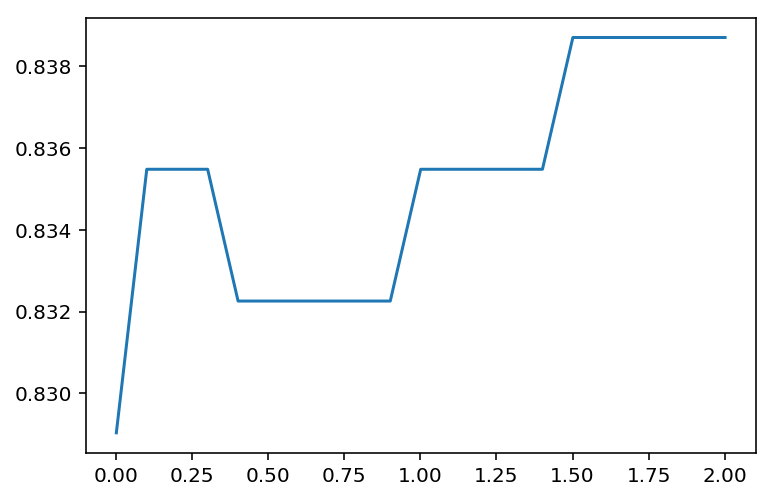

In [51]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

### SVM


Введем список настраиваемых параметров:

In [52]:
param_range = np.arange(0.1, 1.01, 0.1)
tuned_parameters = [{'gamma': param_range}]
tuned_parameters

[{'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

Запустим подбор параметра:

In [53]:
gs = GridSearchCV(SVC(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10),
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

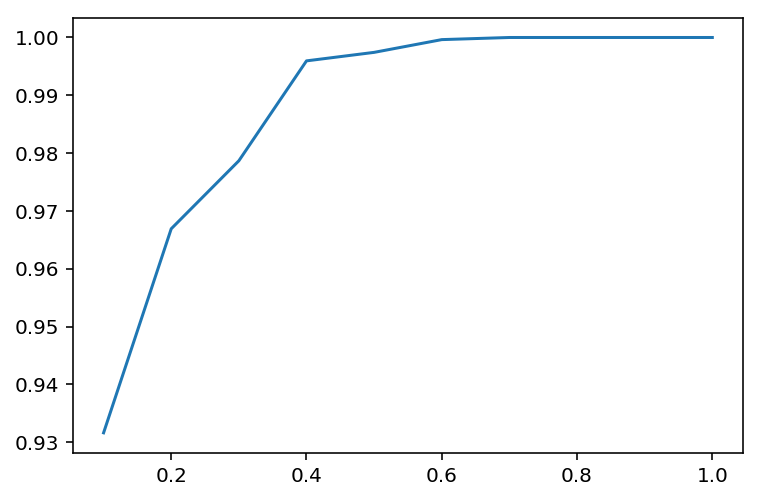

In [54]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

Видно, что метод NuSVR справляется лучше, но не глобально. При&nbsp;этом также видно, что разработчики библиотеки scikit-learn провели хорошую работу: получившееся оптимальное значение $\nu=0{,}5$ является стандартным для&nbsp;данного алгоритма<cite data-cite="doc:sklearn"></cite>.

На&nbsp;тестовом наборе данных картина ровно та же:

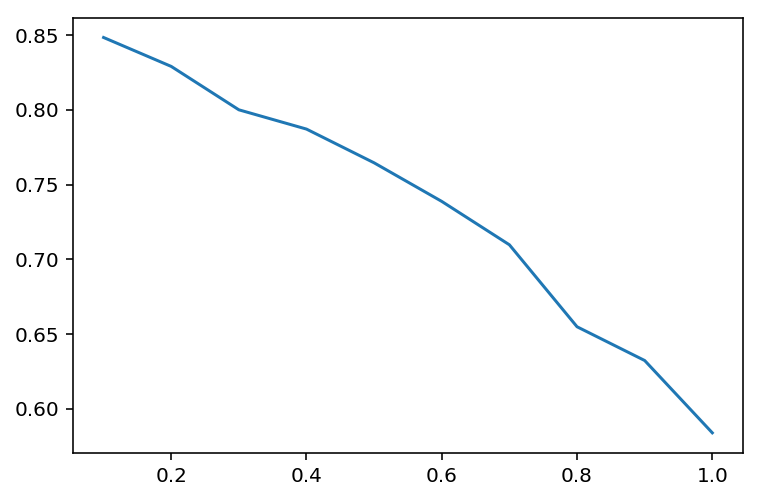

In [55]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Так как параметры подобраны те же, то и обучение модели заново производить не&nbsp;будем.

### Дерево решений


Введем список настраиваемых параметров:

In [56]:
param_range = np.arange(1, 51, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [57]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

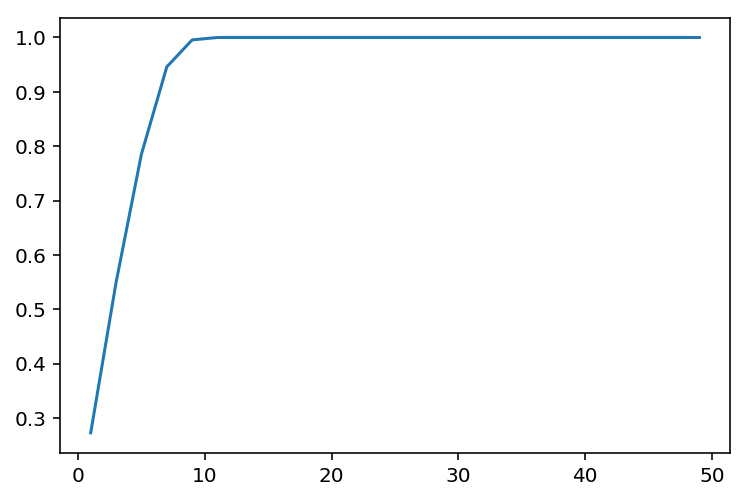

In [58]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

Видно, что на&nbsp;тестовой выборке модель легко переобучается.

На тестовом наборе данных картина интереснее:

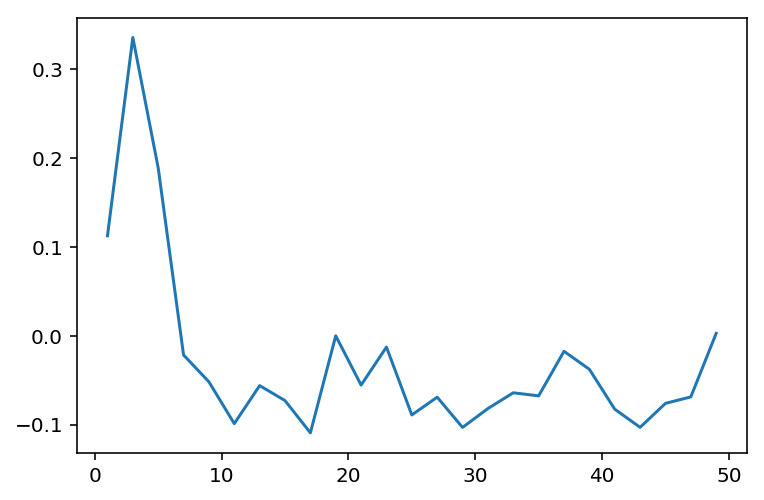

In [59]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Проведем дополнительное исследование в районе пика.

In [60]:
param_range = np.arange(7, 14, 1)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 7,  8,  9, 10, 11, 12, 13])}]

In [61]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

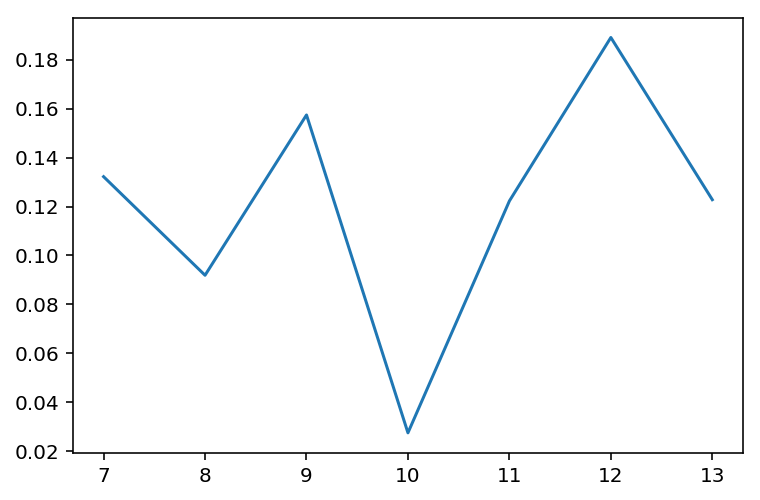

In [62]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Получили, что глубину дерева необходимо ограничить 10&nbsp;уровнями. Проверим этот результат.

In [63]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.2894736842105263
median_absolute_error: 0.0
accuracy: 0.7105263157894737
balanced_accuracy: 0.7103942652329749


In [64]:
X_train

array([[-1.1432911 ,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188],
       [ 0.29046364,  0.68100522,  1.00257707, ...,  0.97635214,
         0.26508221,  1.12302895],
       [ 0.84190778, -1.46841752, -0.93851463, ..., -2.27457861,
         2.22410436,  1.12302895],
       ...,
       [ 0.40075247,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [-0.26098049,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887, -2.14887271],
       [-0.26098049,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188]])

Вновь посмотрим статистику получившегося дерева решений.

In [65]:
stat_tree(reg)

Всего узлов: 71
Листовых узлов: 36
Глубина дерева: 9
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 6.083333333333333


В целом получили примерно тот же результат. Коэффициент детерминации оказался немного выше, тогда как абсолютные ошибки также стали немного выше. Видно, что дерево решений достигло своего предела. При этом весьма поразительно, насколько хорошо данный метод решил задачу регрессии. Посмотрим на построенное дерево.

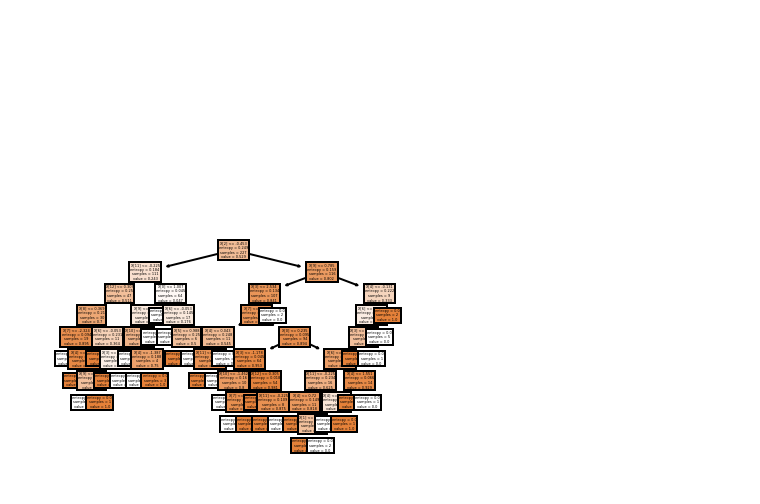

In [66]:
plot_tree(reg, filled=True);

Вывод функции `plot_tree` выглядит весьма странно. Видимо, для&nbsp;настолько больших деревьев решений она не&nbsp;предназначена. Возможно, это со&nbsp;временем будет исправлено, так как эту функциональность только недавно добавили.

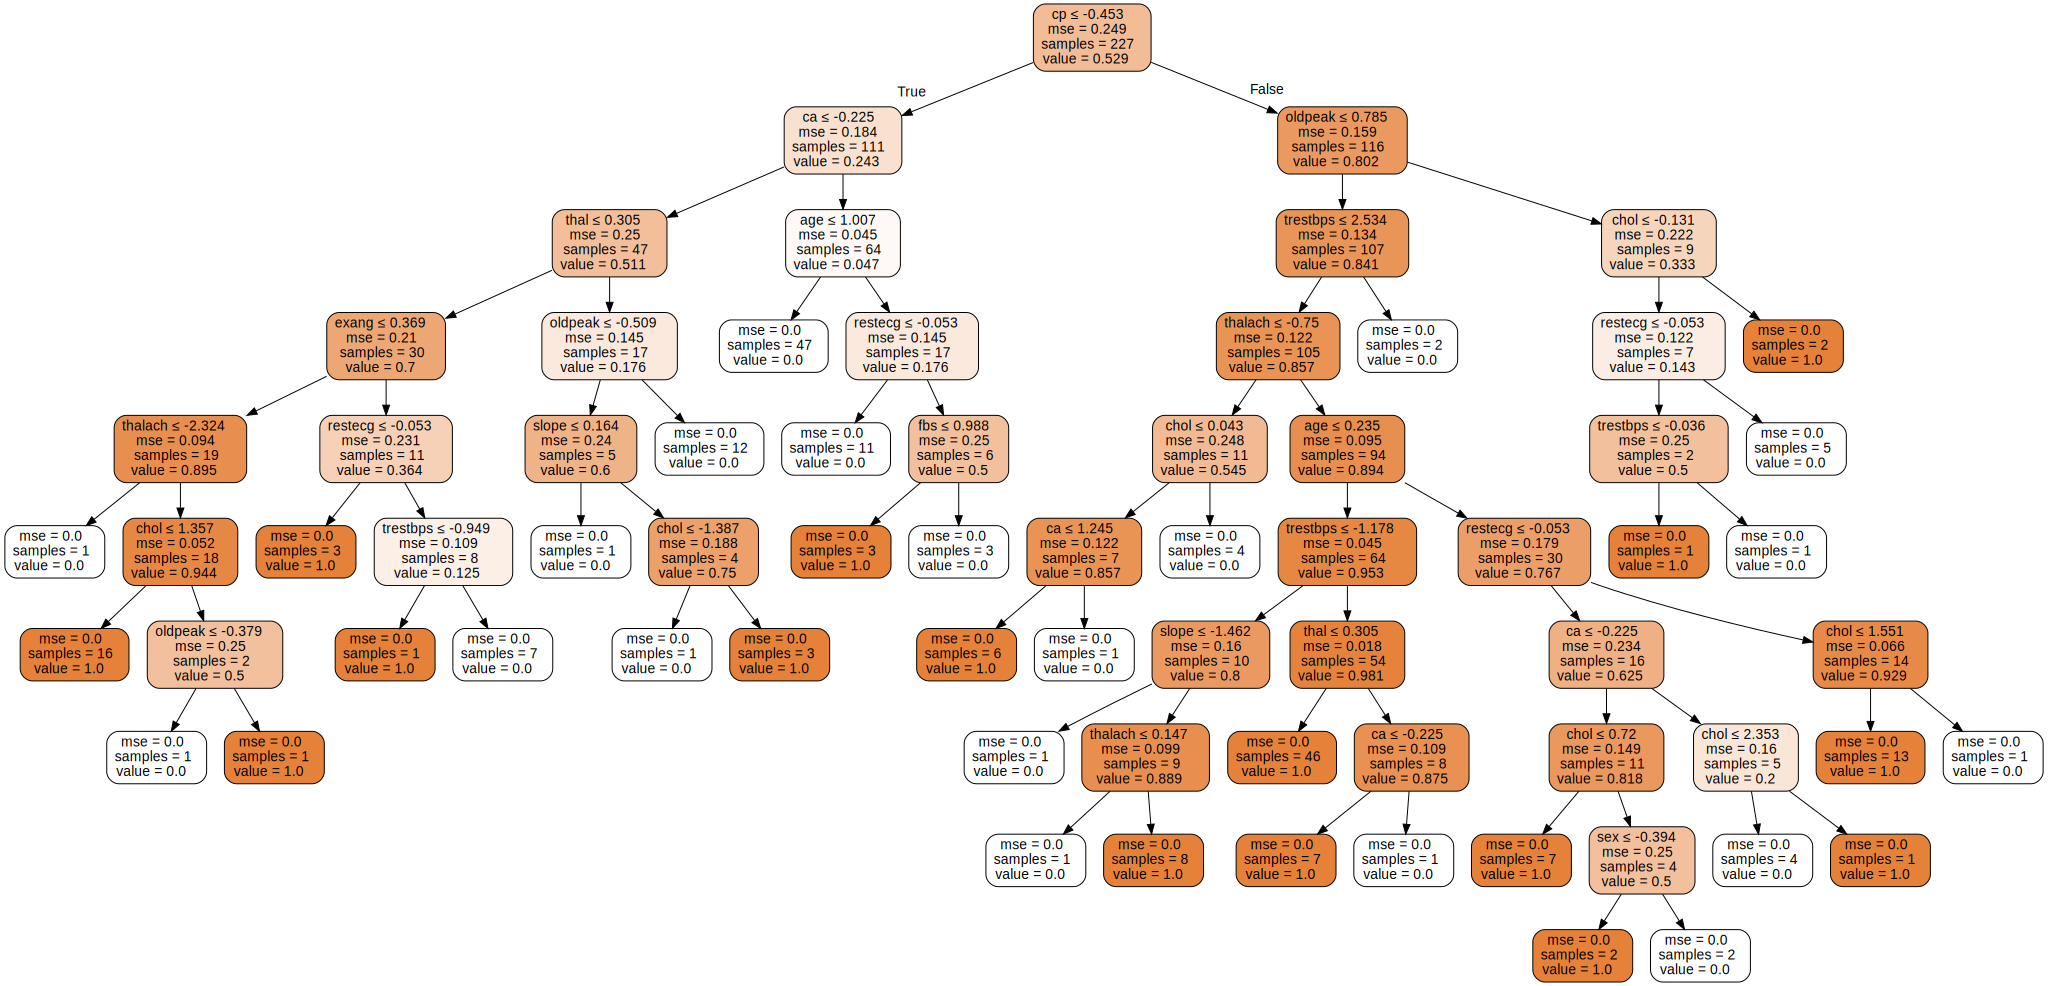

In [69]:
dot_data = export_graphviz(reg, out_file=None, feature_names=columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Вывод
Такое дерево уже можно анализировать. Видно, что сгенерировалось огромное множество различных условий, и, фактически, модель переобучена, но с другой стороны дерево решений и не могло быть построено иначе для задачи регрессии. К тому же на тестовой выборке данное дерево работает также довольно хорошо, так что оно имеет право на существование. Особенно при том, что у нас стоит задача классификации.